In [1]:
using Pkg
using Optim
using PyPlot
using LinearAlgebra
using FFTW
using Random

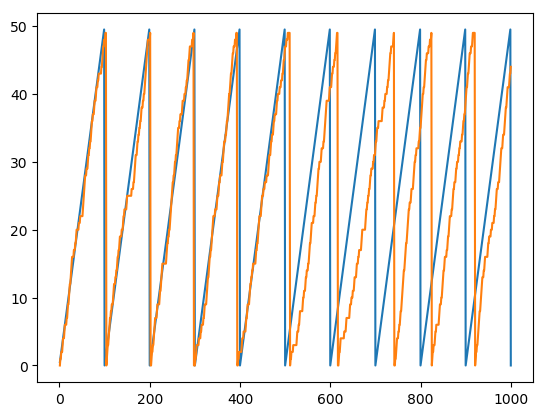

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fa2ace231d0>

In [2]:
T = 1000
xs = zeros(T)
ys = zeros(T)

x = 0
y = 0
es = zeros(T)
rs = zeros(T)

f(z,a) = mod(z+a,50.0)

for t=1:T
    e = .5
    x = f(x,e)
    xs[t] = x
    es[t] = e
    
    r = randsubseq([1],0.5)
    r = Integer(r != [])
    y = f(y,r)
    ys[t] = y
    rs[t] = r
end

figure(1)
plot(collect(1:T),xs)
plot(collect(1:T),ys)

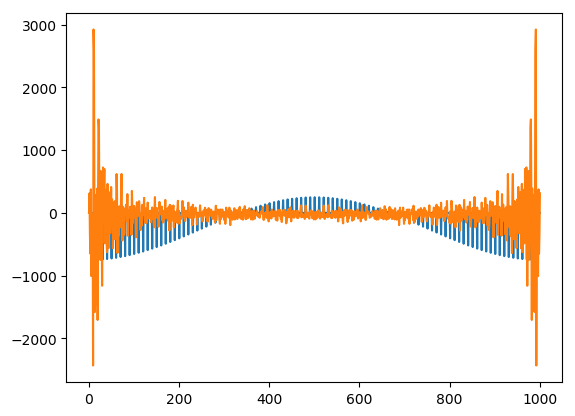

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fa2c01c0ef0>

In [3]:
fs = fft(xs.- sum(xs)/T)
fs = reinterpret(Float64, fs)
fre = @view fs[1:2:end-1]
fim = @view fs[2:2:end]

gs = fft(ys.- sum(ys)/T)
gs = reinterpret(Float64, gs)
gre = @view gs[1:2:end-1]
gim = @view gs[2:2:end]


plot(collect(1:T),fre,label="re1")
plot(collect(1:T),gre,label="re2")


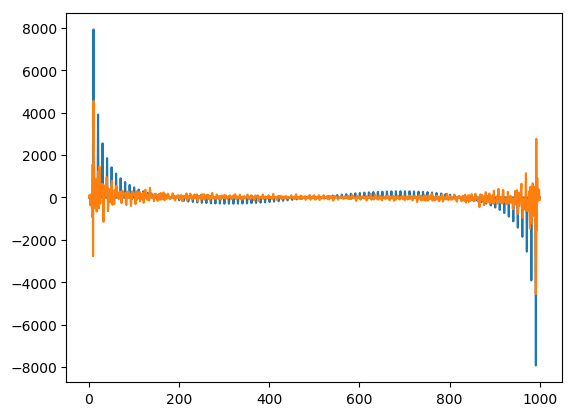

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fa29767d5f8>

In [5]:
figure(2)
plot(collect(1:T),fim,label="im")
plot(collect(1:T),gim,label="im")

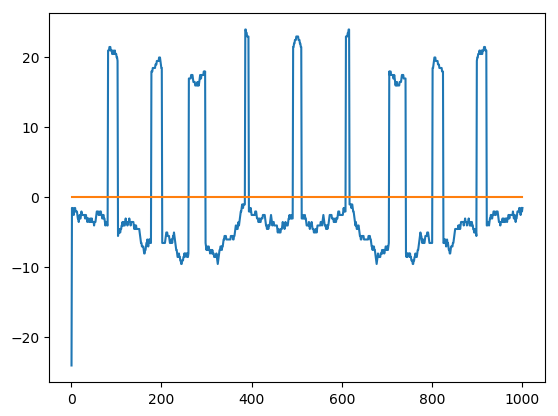

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fa2958096a0>

In [14]:
plot(collect(1:T),ifft(gre),label="im")
plot(collect(1:T),ifft(gim),label="re")
#plot(collect(1:T),ifft(gim),label="im")